In [2]:
x = 5
dir(x)

import math


## Calculating pi

Imagine you have a 1 meter by 1 meter square. This square has a circle
inscribed in it so that the diameter of the circle is 1 meter.

If you generate random points in the square, you should be able to tell if the
points are inside or outside the circle.

Given that information, you should be able to find the percentage of points
inside the circle, which will give you the area of the circle. If you remember,
a circle's area is equal to pi times the radius squared, so you should be
able to calculate pi.

* function to calculate distance between points
* function to determine if a point is inside the circle
* function that generates a lot of random points and counts how many of those are inside the circle vs. how many total points were generated
* have that function repeat a bunch of times and print out the results


In [37]:
import math
import random

def distance(x, y):
    return math.sqrt(x**2 + y**2)

def is_inside(x, y, radius):
    if distance(x, y) <= radius:
        return True
    else:
        return False

def sim_point(radius):
    x = random.uniform(-radius, radius)
    y = random.uniform(-radius, radius)
    
#     print(x, y)
    return is_inside(x, y, radius)

def run_sim():
    num_hits = 0
    num_trials = 100000
    for _ in range(num_trials):
        if sim_point(.5) == True:
            num_hits += 1
    
    print("{} hits/{} trials = {}".format(num_hits, num_trials, num_hits/num_trials))
    
run_sim()

78624 hits/100000 trials = 0.78624


In [22]:
math.pi * 0.5**2

0.7853981633974483

# Statistics

**Statistics**: numbers that tell a story, often involving estimates and probabilities


## Common stats

* mean
* median
* mode
* variance
* standard deviation
  * population standard deviation
  * sample standard deviation


In [38]:
import statistics as st


In [39]:
dir(st)

['Decimal',
 'Fraction',
 'StatisticsError',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_check_type',
 '_counts',
 '_decimal_to_ratio',
 '_exact_ratio',
 '_ss',
 '_sum',
 'collections',
 'math',
 'mean',
 'median',
 'median_grouped',
 'median_high',
 'median_low',
 'mode',
 'pstdev',
 'pvariance',
 'stdev',
 'variance']

## Mean, median, and mode

The **mean** is the hard average - add all the numbers up, divide by how  many there are. It's sometimes called _mu_ or _µ_

The **median** is the middle value of a sorted collection of things

The **mode** is the most frequently occurring value

In [41]:
sample_data = [random.randint(1, 100) for _ in range(40)]

In [43]:
print(sample_data)

[92, 23, 77, 33, 47, 10, 75, 61, 6, 74, 55, 42, 59, 34, 90, 6, 91, 40, 39, 84, 12, 17, 63, 41, 44, 19, 34, 49, 55, 73, 95, 5, 20, 76, 2, 96, 88, 59, 64, 37]


In [45]:
def mean(coll):
    return sum(coll) / len(coll)

print(mean(sample_data))

49.675


In [57]:
def median(coll):
    sorted_coll = sorted(coll)
    n = len(coll)
    if n % 2 == 0:
        # even number of data items
        # find average of middle two points
        middle_index = n // 2
        return mean(sorted_coll[middle_index-1:middle_index+1])
    else:
        middle_index = n // 2
        return sorted_coll[middle_index]


In [53]:
print(median([2,3,4,5]))

3.5


In [59]:
print(median([2,3,4,5,6]))

4


In [60]:
print(median(sample_data))

48.0


In [68]:
big_data = [random.randint(1, 100) for _ in range(10000)]

In [69]:
print(mean(big_data))

50.8172


In [64]:
print(median(big_data))

50.0


In [77]:

def mode(coll):
    counts = {}
    for x in coll:
        if x not in counts:
            counts[x] = 1
        else:
            counts[x] += 1
    
#     sorted_counts = sorted(counts.items(), key=lambda c: c[1], reverse=True)
    
#     for x in sorted_counts:
#         if sorted_counts[x][1] == sorted_counts[0][1]
#     return sorted_counts[0][0]
    highest_count = max(counts.values())
    
    return [key for key, count in counts.items() if count == highest_count]
    
mode([11,11,11,12,13,14,14,14,15])


[11, 14]

In [78]:
mode(sample_data)

[6, 34, 55, 59]

For a uniform distribution, we expect the mean and median to be about equal. We don't have any expectatinos about the mode.

In [80]:
print(mean(sample_data))
print(st.mean(sample_data))

49.675
49.675


In [81]:
print(median(sample_data))
print(st.median(sample_data))

48.0
48.0


In [82]:
print(mode(sample_data))
print(st.mode(sample_data))

[6, 34, 55, 59]


StatisticsError: no unique mode; found 4 equally common values

The **quantile** is a general form of the median for any point along a distribution. The **quantile** for _x_% is the value where _x_% of the collection is less than that value.

The **median** would be the quantile at 50% (quantile(.5))

In [83]:
def quantile(coll, percent):
    """percent is a float between [0,1)
    """
    n = len(coll)
    idx = int(percent * n)
    sorted_coll = sorted(coll)
    return sorted_coll[idx]
    

In [84]:
quantile(sample_data, 0.5)

49

In [86]:
median(sample_data)

48.0

In [88]:
print(sorted(sample_data))

[2, 5, 6, 6, 10, 12, 17, 19, 20, 23, 33, 34, 34, 37, 39, 40, 41, 42, 44, 47, 49, 55, 55, 59, 59, 61, 63, 64, 73, 74, 75, 76, 77, 84, 88, 90, 91, 92, 95, 96]


In [89]:
quantile(sample_data, 0.25)

33

In [90]:
quantile(sample_data, 0.75)

75

In [91]:
quantile(sample_data, 0.99)

96

In [92]:
quantile(sample_data, 1.0)

IndexError: list index out of range

In [93]:
quantile(sample_data, 0.0)

2

# Range of data

There are several ways we can calculate how "spread out" our data is.



In [94]:
def data_range(coll):
    return max(coll) - min(coll)

In [95]:
data_range(sample_data)

94

## Variance and standard deviation

The standard deviation (sometimes called _sigma_ or _σ_) is a measurement of how spread out the numbers are, calculated using the _variance_.

The _variance_ is the average of the squared differences from the mean.



In [98]:
lifespans = [19, 16, 15, 10, 17, 19, 13, 10, 17, 11]

mean_lifespan = mean(lifespans)
print(mean_lifespan)

14.7


In [99]:
data_range(lifespans)

9

In [102]:
def differences_from_mean(coll):
    mean_coll = mean(coll)
    return [x - mean_coll for x in coll]

def sum_of_squares(coll):
    return sum([x**2 for x in coll])

def sample_variance(coll):
    return sum_of_squares(differences_from_mean(coll)) / (len(coll) - 1)

sample_variance(lifespans)

12.233333333333334

In [103]:
def sample_stdev(coll):
    return math.sqrt(sample_variance(coll))

sample_stdev(lifespans)

3.497618237219913

Standard deviation is the square root of the variance

In [104]:
st.stdev(lifespans)

3.497618237219913

## What does standard deviation actually mean?

For a *gaussian* distribution of data, ~68% of the data points should lie within 1 standard deviation of the mean in either direction, ~95% should be within 2 in either direction, and ~99.7% should lie within 3. Sometimes this is called the 68-95-99 rule.


## Interquartile range

The range from the 25%ile to the 75%ile

In [105]:
def interquartile_range(coll):
    return quantile(coll, 0.75) - quantile(coll, 0.25)

interquartile_range(lifespans)

6

## Further Reading on stats

* [Math is Fun - Statistics](http://www.mathsisfun.com/data/index.html)
* [Robert Niles' Statistics Guide](http://www.robertniles.com/stats/)


# Plotting



In [106]:
import random
import math
import statistics
import matplotlib.pyplot as plt

If you get an error with the above, do the following inside your virtualenv

```bash
$ pip install matplotlib
```

In [107]:
%matplotlib inline

In [108]:
data = [random.gauss(0, 5) for _ in range(10000)]

In [109]:
help(random.gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



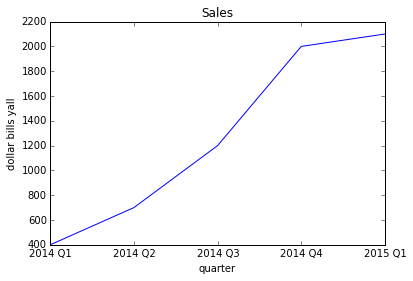

In [127]:
x1 = ['2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1']
y1 = [400, 700, 1200, 2000, 2100]

plt.plot(y1)
plt.xticks(range(5), x1)
plt.xlabel('quarter')
plt.ylabel('dollar bills yall')
plt.title('Sales')
plt.show()

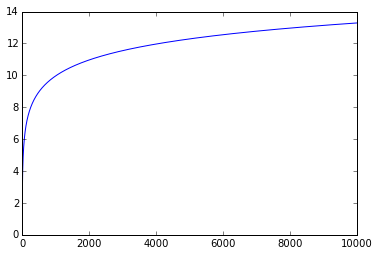

In [130]:
log_nums = [math.log2(n + 1) for n in range(10000)]

plt.plot(log_nums)
plt.show()

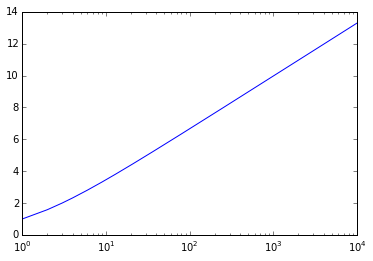

In [131]:
plt.plot(log_nums)
plt.xscale('log')
plt.show()

In [132]:
def roll2():
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    
    return die1 - die2



In [138]:
num = 0
nums = [0]
for _ in range(10000):
    num += roll2()
    nums.append(num)

In [139]:
num

-337

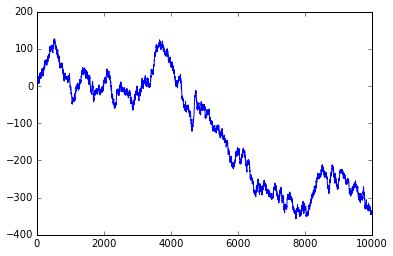

In [140]:
plt.plot(nums)
plt.show()

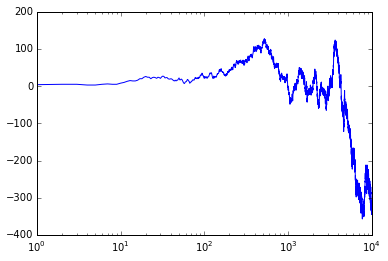

In [141]:
plt.plot(nums)
plt.xscale('log')
plt.show()

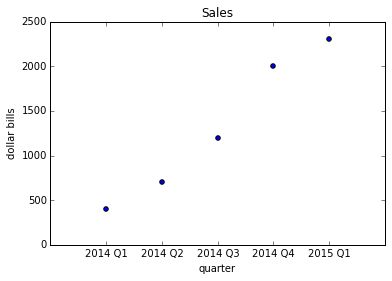

In [142]:
x1 = ["2014 Q1", "2014 Q2", "2014 Q3", "2014 Q4", "2015 Q1"]
y1 = [400, 700, 1200, 2000, 2300]
plt.scatter(range(5), y1)
plt.xticks(range(5), x1)
plt.xlabel("quarter")
plt.ylabel("dollar bills")
plt.title("Sales")
plt.show()

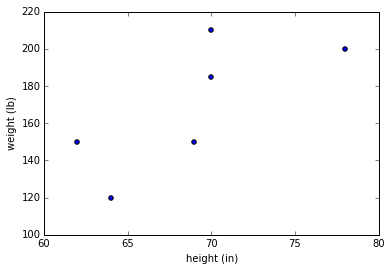

In [143]:
heights = [70, 64, 78, 62, 69, 70]
weights = [210, 120, 200, 150, 150, 185]

plt.scatter(heights, weights)
plt.xlabel("height (in)")
plt.ylabel("weight (lb)")
plt.show()

[(70, 64, 78, 62, 69, 70), (210, 120, 200, 150, 150, 185)]


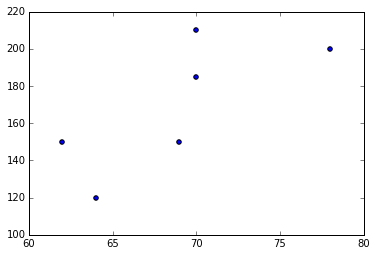

In [152]:
bmi_data = [(70, 210), (64, 120), (78, 200), (62, 150), (69, 150), (70, 185)]

print(list(zip(*bmi_data)))

plt.scatter(*zip(*bmi_data))
plt.show()

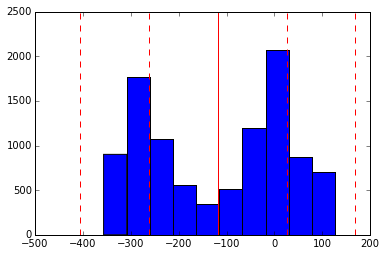

In [157]:
plt.hist(nums)
mean = statistics.mean(nums)
stdev = statistics.stdev(nums)
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyles='dashed')
plt.show()

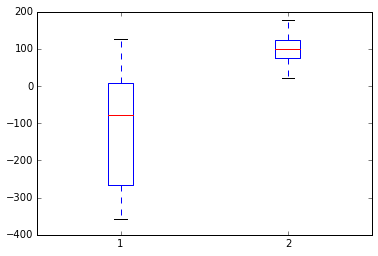

In [160]:

group1 = [random.triangular(20, 180, 100) for _ in range(10000)]
plt.boxplot([nums, group1])
plt.show()

When you graph these two bits of data, the result clearly shows that there is no...